In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load speech file

In [63]:
# load data from pickle file
import pickle

pickle_in = open("speeches.pickle", "rb")
speech_df = pickle.load(pickle_in)

In [64]:
speech_df.head()

,type,speaker,date,speech
0,convention,Hillary Clinton,2016,Thank you all for the great convention that we...
1,convention,Robert Dole,1996,The folks in Hollywood would be happy to know ...
2,convention,George W. Bush,2000,"Thank you. Thank you for this honor. [,],Thank..."
3,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u..."
4,convention,John McCain,2008,"Tonight, I have a privilege given few American..."


In [65]:
speech_text = speech_df['speech']

In [201]:
speech_df['tag'] = speech_df['date'].apply(str) + ' ' + speech_df['type']

In [202]:
speech_df.head()

,type,speaker,date,speech,tag
0,convention,Hillary Clinton,2016,Thank you all for the great convention that we...,2016 convention
1,convention,Robert Dole,1996,The folks in Hollywood would be happy to know ...,1996 convention
2,convention,George W. Bush,2000,"Thank you. Thank you for this honor. [,],Thank...",2000 convention
3,convention,George W. Bush,2004,"When I said those words 4 years ago, none of u...",2004 convention
4,convention,John McCain,2008,"Tonight, I have a privilege given few American...",2008 convention


## Sentiment Analysis

In [21]:
from textblob import TextBlob

In [36]:
speech_text[0:3]

0    Thank you all for the great convention that we...
1    The folks in Hollywood would be happy to know ...
2    Thank you. Thank you for this honor. [,],Thank...
Name: speech, dtype: object

In [54]:
polarity_list = []
subjectivity_list = []

for speech in speech_text:
    polarity_list.append(TextBlob(speech).sentiment[:][0])
    subjectivity_list.append(TextBlob(speech).sentiment[:][1])

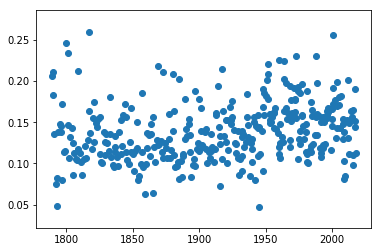

In [67]:
fig, ax = plt.subplots()
ax.scatter(speech_df['date'], polarity_list);

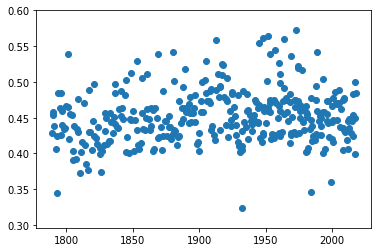

In [68]:
fig, ax = plt.subplots()
ax.scatter(speech_df['date'], subjectivity_list);

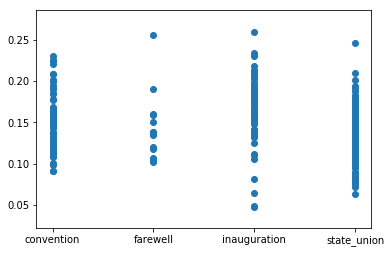

In [69]:
fig, ax = plt.subplots()
ax.scatter(speech_df['type'], polarity_list);

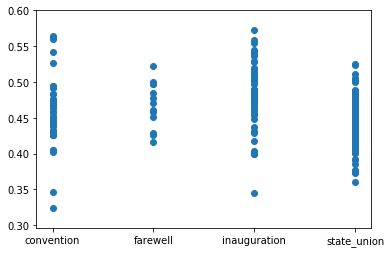

In [70]:
fig, ax = plt.subplots()
ax.scatter(speech_df['type'], subjectivity_list);

## Keyword searching


In [112]:
import nltk
from nltk.tokenize import wordpunct_tokenize

Pattern of self vs collective references

In [90]:
# define pronouns to search for

i_words = ['i', 'me', 'my', 'mine', 'myself']
we_words = ['we', 'us', 'our', 'ours', 'ourselves']
u_words = ['you', 'your', 'yours', 'yourself', 'yourselves']
third_words = ['he', 'him', 'his', 'himself', 
               'she', 'her', 'hers', 'herself', 
               'they', 'them', 'their', 'theirs', 'themselves']

In [196]:
# tfidf leave pronouns in 

remove = ['.', ',', '(', ')', "'", '"', '?', '!', '.,', '...', 'applause', 'laughter']

i_per = []
we_per = []
u_per = []
third_per = []

for speech in speech_text:

    words = wordpunct_tokenize(speech)
    words = [w.lower() for w in words if w not in remove]
    
    freqs = Counter()
    
    for word in words:
        if word in i_words:
            freqs['i_words'] += 1
        elif word in we_words:
            freqs['we_words'] += 1
        elif word in u_words:
            freqs['u_words'] += 1
        elif word in third_words:
            freqs['third_words'] += 1
        else:
            pass

    i_per.append(freqs['i_words'] / len(words) * 100)
    we_per.append(freqs['we_words'] / len(words) * 100)
    u_per.append(freqs['u_words'] / len(words) * 100)
    third_per.append(freqs['third_words'] / len(words) * 100)

# print(i_per)
# print(we_per)
# print(u_per)
# print(third_per)
    

In [208]:
df_words = pd.DataFrame({'speech': speech_df['tag'], 'i_words': i_per, 'we_words': we_per, 'u_words': u_per, 'third_words': third_per})

In [210]:
df_words.sort_values(by='i_words', ascending=False).head()

,i_words,speech,third_words,u_words,we_words
82,6.759907,1974 inauguration,0.932401,1.981352,1.981352
63,6.569343,1793 inauguration,0.000000,0.729927,0.000000
4,5.506750,2008 convention,2.528391,1.457039,3.342618
122,4.547945,1974 farewell,0.821918,0.547945,2.191781
14,4.307869,1952 convention,1.033889,2.010339,2.354968


In [211]:
df_words.sort_values(by='we_words', ascending=False).head()

,i_words,speech,third_words,u_words,we_words
72,0.298656,2013 inauguration,0.846192,0.199104,7.914385
77,0.962155,1993 inauguration,0.769724,0.705581,7.633098
81,1.420217,1977 inauguration,0.417711,0.584795,7.351713
94,0.099602,1905 inauguration,0.796813,0.000000,7.270916
90,1.374570,1945 inauguration,1.030928,0.171821,7.216495


In [212]:
df_words.sort_values(by='u_words', ascending=False).head()

,i_words,speech,third_words,u_words,we_words
16,2.790698,1864 convention,1.395349,2.325581,0.000000
125,1.742301,2017 farewell,0.850891,2.025932,4.801459
14,4.307869,1952 convention,1.033889,2.010339,2.354968
82,6.759907,1974 inauguration,0.932401,1.981352,1.981352
54,2.336350,2012 convention,1.894338,1.936434,3.788676


In [213]:
df_words.sort_values(by='third_words', ascending=False).head()

,i_words,speech,third_words,u_words,we_words
60,1.678766,1805 inauguration,3.856624,0.362976,2.087114
13,2.500919,1948 convention,3.273262,0.478117,0.919456
143,0.808727,2018 state_union,2.557833,0.545420,4.589054
4,5.506750,2008 convention,2.528391,1.457039,3.342618
0,2.415202,2016 convention,2.503996,1.900195,4.120050


## Pre-processing

In [6]:
from textblob import TextBlob
from nltk.util import ngrams

from collections import Counter
from operator import itemgetter

counter = Counter()

from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']
stop = set(stop)

n = 3
for doc in speech_text:
    words = TextBlob(doc.lower()).words  # tokenize words
    words = [w for w in words if w not in stop]   
    bigrams = ngrams(words, n)
    counter += Counter(bigrams)

for phrase, count in counter.most_common(30):
    print('%20s %i' % (" ".join(phrase), count))

citizens united states 183
      ending june 30 177
government united states 175
    year ending june 168
people united states 161
    last fiscal year 145
  fiscal year ending 144
last session congress 141
 last annual message 138
president united states 132
united states america 116
 united states great 104
  part united states 100
states great britain 89
congress last session 82
    next fiscal year 76
report secretary war 76
 present fiscal year 75
report secretary treasury 69
    year ending 30th 68
 current fiscal year 67
united states government 66
report secretary navy 66
       ended june 30 65
     year ended june 64
constitution united states 62
    fiscal year 1947 62
interstate commerce commission 60
        world war ii 59
  bank united states 59


## TFIDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.9,
                                 min_df=0.1, stop_words='english',
                                 ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(speech_text)

In [12]:
tfidf_matrix.shape

(356, 3749)

In [17]:
terms = tfidf_vectorizer.get_feature_names()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix)

## Clustering

In [1]:
from sklearn.cluster import KMeans

In [6]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

In [8]:
SSEs = []
Sil_coefs = []
for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_digits)
    labels = km.labels_
    Sil_coefs.append(metrics.silhouette_score(X_digits, labels, metric='euclidean'))
    SSEs.append(get_SSE(X_digits, labels)) # The SSE is just inertia, we
                                            # could have just said km.inertia_

NameError: name 'X_digits' is not defined

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');